In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

np.random.seed(42)
customer_orders_weighted = pd.DataFrame({
    "CustomerID": np.arange(1, 1001),
    "OrderDate": pd.date_range(start="2023-01-01", periods=1000, freq="D"),
    "Repurchase": np.random.choice([0, 1], size=1000, p=[0.7, 0.3])
})
customer_orders_weighted["OrderAmount"] = np.where(
    customer_orders_weighted["Repurchase"] == 1,
    np.random.randint(500, 1000, size=1000),
    np.random.randint(10, 500, size=1000)
)


customer_orders_random = pd.DataFrame({
    "CustomerID": np.arange(1, 1001),
    "OrderDate": pd.date_range(start="2023-01-01", periods=1000, freq="D"),
    "Repurchase": np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),
    "OrderAmount": np.random.randint(10, 1000, size=1000)
})

In [2]:
customer_orders_weighted

,CustomerID,OrderDate,Repurchase,OrderAmount
0,1,2023-01-01,0,335
1,2,2023-01-02,1,511
2,3,2023-01-03,1,817
3,4,2023-01-04,0,388
4,5,2023-01-05,0,436
...,...,...,...,...
995,996,2025-09-22,0,140
996,997,2025-09-23,1,770
997,998,2025-09-24,0,227
998,999,2025-09-25,1,931


In [3]:
customer_orders_random

,CustomerID,OrderDate,Repurchase,OrderAmount
0,1,2023-01-01,0,137
1,2,2023-01-02,0,831
2,3,2023-01-03,1,486
3,4,2023-01-04,1,769
4,5,2023-01-05,0,413
...,...,...,...,...
995,996,2025-09-22,1,347
996,997,2025-09-23,1,969
997,998,2025-09-24,1,175
998,999,2025-09-25,0,392


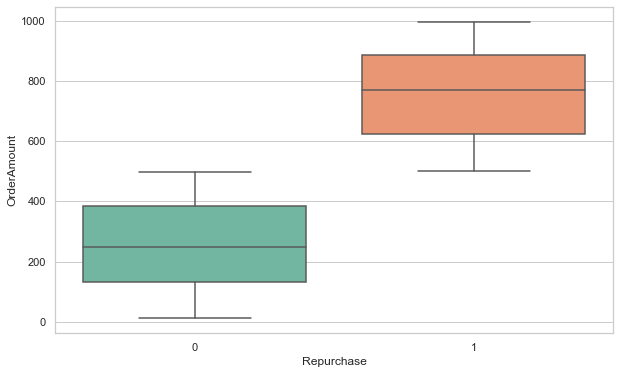

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(x='Repurchase', y ='OrderAmount', data = customer_orders_weighted, palette ='Set2')
plt.show()

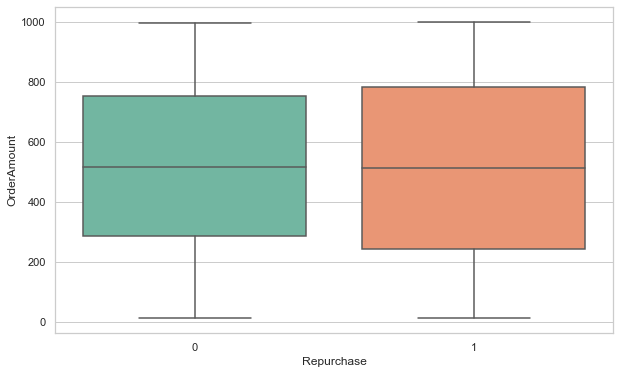

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Repurchase', y ='OrderAmount', data = customer_orders_random, palette ='Set2')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
#랜덤한 데이터를 학습해 보자!

X = customer_orders_random[['OrderAmount']]
y = customer_orders_random[['Repurchase']]

## trian,test 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [8]:
## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)

## y_pred
y_pred = dt.predict(X_test)

In [9]:
dt

DecisionTreeClassifier(random_state=111)

In [10]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [11]:
## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print(acc)

0.555


### 랜덤하지 않은 데이터셋을 (가중치를 둔 데이터셋을 학습시키면 어떨까?)

In [13]:
X = customer_orders_weighted[['OrderAmount']]
y = customer_orders_weighted[['Repurchase']]

## trian,test 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)

## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print(acc)

1.0


### 결측값을 만들어서, 해당 결측값을 다양하게 처리해 보고 실제 성능도 확인해 보자!

In [15]:
customer_orders_random

,CustomerID,OrderDate,Repurchase,OrderAmount
0,1,2023-01-01,0,137
1,2,2023-01-02,0,831
2,3,2023-01-03,1,486
3,4,2023-01-04,1,769
4,5,2023-01-05,0,413
...,...,...,...,...
995,996,2025-09-22,1,347
996,997,2025-09-23,1,969
997,998,2025-09-24,1,175
998,999,2025-09-25,0,392


In [16]:
missing_indices=np.random.choice(customer_orders_random.index, size= int(0.1 * len(customer_orders_random)), replace=False)
customer_orders_random.loc[missing_indices, 'OrderAmount'] = np.nan #na값으로 바꾼다

In [17]:
#isna().sum() na값이 존재한다.
customer_orders_random.isna().sum()

CustomerID       0
OrderDate        0
Repurchase       0
OrderAmount    100
dtype: int64

- 1. Remove NA -> 모델링
- 2. Replace NA with mean -> 모델링
- 3. Replace NA with KNN Imputer -> 모델링 (K, Nearest, Neighbors) 
    - 내 주변에 있는 k 값만 큼의 데이터를 확인해서 내 근처에 있는 값들의 평균 등으로 결측값을 대치한다.

In [18]:
# NA값 제거하기
X= customer_orders_random['OrderAmount'].values.reshape(-1,1)
y= customer_orders_random['Repurchase']

In [19]:
## NA값을 어떻게 나눌까?

X_no_na =X[~np.isnan(X[:,0])] # NA값이 아닌 X의 값
y_no_na =y[~np.isnan(X[:,0])] # NA값이 아닌 X의 인덱스 기준의 y의 값


X_train, X_test, y_train, y_test = train_test_split(X_no_na,y_no_na, test_size=0.2, random_state=111)
## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)

## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print(acc)

0.5555555555555556


In [20]:
np.isnan(X[:,0])

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [21]:
missing_indices

array([393, 133, 771,  85, 168, 819, 663, 934, 260, 512, 999, 295, 218,
        36, 455, 731, 256, 742, 364, 156, 458,  58, 787, 339, 676, 483,
       554,  54, 769,  48, 772, 697, 460, 560,   6, 728,  91, 113,  61,
       978, 649, 169, 338, 475, 441, 308, 166, 173, 420, 409,  13, 822,
       152, 575, 559, 171, 413, 279, 621, 306, 335, 593, 353, 294,  22,
       755, 633, 636, 511,  51, 203, 408, 916, 557, 877, 321, 779, 900,
       479, 222, 101, 694, 749, 130, 812, 686,  32,  50, 813, 361, 276,
       116, 233, 706, 204, 467, 892, 661, 234,  66], dtype=int64)